Saving Dataset (ATS)-1.csv to Dataset (ATS)-1 (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB
Index(['gender', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'Contract'],
      dtype='object')
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7423 - loss: 0.5368 - val_accuracy: 0.7950 - val_loss: 0.4188
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.4347 - val_accuracy: 0.8057 - val_loss: 0.4123
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7920 - loss: 0.4251 - val_accuracy: 0.8057 - val_loss: 0.4162
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.4295 - val_accuracy: 0.7959 - val_loss: 0.4137
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4221 - val_accuracy: 0.8030 - val_loss: 0.4165
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4200 - val_accuracy: 0.8039 - val_loss: 0.4177
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.4456 - val_accuracy: 0.7977 - val_loss: 0.4147
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.4160 - val_accuracy: 0.8021 - val_

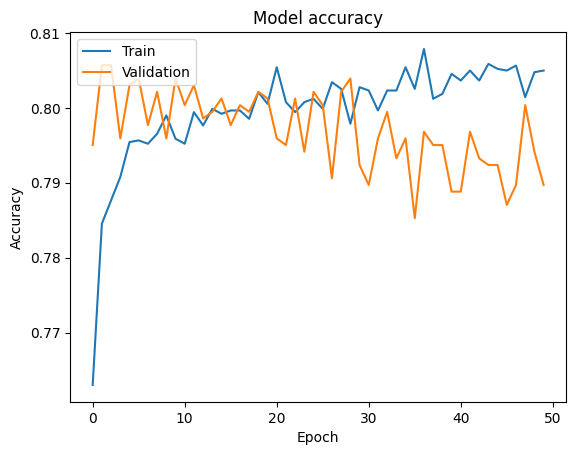

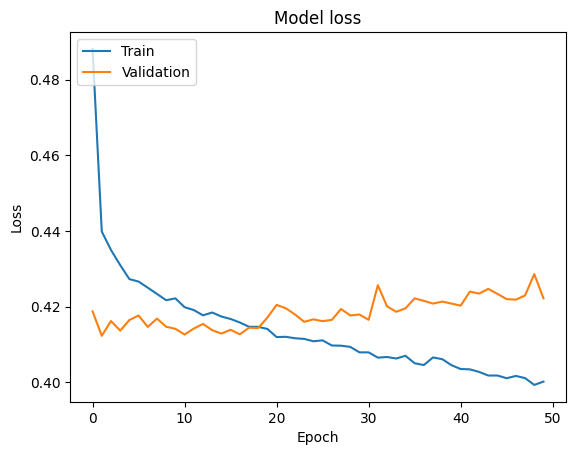

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[922 114]
 [158 215]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.58      0.61       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset
from google.colab import files
uploaded = files.upload()

# Replace 'Dataset (ATS)-1.csv' with your actual file name
df = pd.read_csv('Dataset (ATS)-1.csv')

# Step 2: Explore the dataset
df.head()  # View the first few rows of the dataset
df.info()  # Check for data types and missing values
df.describe()  # Get summary statistics

# Step 3: Preprocess the data
# Encode the 'Churn' column (target) as binary: 1 for 'Yes', 0 for 'No'
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Set X and y
X = df.drop('Churn', axis=1)  # Features (independent variables)
y = df['Churn']  # Target (dependent variable)

# Handle categorical variables (convert them to numerical)
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
print(categorical_columns)  # Prints columns like ['gender', 'Dependents', etc.]

# Encoding categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Normalize (scale) the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Define the model
model = Sequential()

# Input layer (with input shape equal to number of features)
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output layer (with a single neuron for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Step 6: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Step 8: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Step 9: Plot the training history
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 10: Generate Predictions and Evaluate
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y_test, predictions))
